STT: 20

Họ và tên: Phạm Đức Thể

MSSV: 19522253

Lớp: DS105.M11.2

Thi Thực Hành - 06/12/2021

# [Thi Thực Hành]()

## Import các thư viện cần thiết

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
url_data = 'https://gitlab.com/uitgit/datasets/-/raw/master/TH2021.csv'

## **Câu 1**: Tạo df lưu trữ dataset và xuất ra 10 sample bất kỳ. Dataset có bao nhiêu sample và bao nhiêu feature.

In [3]:
df = pd.read_csv(url_data)

In [5]:
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7236,9264920250,20140710T000000,290256.0,3.0,2.25,1720,7885,2.0,0,0,3,8,1720,0,1983,0,98023,47.3136,-122.344,2340,7885
6078,8691300060,20141023T000000,780000.0,4.0,2.50,3690,13609,2.0,0,2,3,10,3690,0,1996,0,98075,47.5872,-121.972,3600,13609
5533,5132000140,20140618T000000,175000.0,6.0,1.00,1370,5080,1.5,0,0,3,6,1120,250,1931,0,98106,47.5238,-122.350,1020,5080
21338,1592000640,20141119T000000,570000.0,3.0,2.25,2180,9246,2.0,0,0,3,9,2180,0,1984,0,98074,47.6215,-122.031,2300,9298
2393,4222310010,20150420T000000,267950.0,4.0,1.00,1730,7350,1.5,0,0,4,6,1730,0,1970,0,98003,47.3467,-122.307,1440,7752
10611,9542830350,20140902T000000,296000.0,4.0,2.50,1780,3600,2.0,0,0,3,7,1780,0,2006,0,98038,47.3665,-122.017,2020,3802
21136,1726069051,20140523T000000,306000.0,2.0,1.00,780,13500,1.0,0,0,4,7,780,0,1946,1989,98077,47.7383,-122.074,2200,67518
17671,9455200205,20140604T000000,525000.0,3.0,2.00,1540,7800,1.0,0,0,3,8,1540,0,2004,0,98125,47.7041,-122.288,1510,7800
16978,2159900120,20140822T000000,419000.0,2.0,2.50,1470,2034,2.0,0,0,4,8,1470,0,1985,0,98007,47.6213,-122.153,1510,2055
7896,3083000940,20150412T000000,341000.0,2.0,1.00,1040,4000,1.0,0,0,3,6,1040,0,1914,0,98144,47.5753,-122.303,1740,4000


In [6]:
print('Dataset có {} sample và {} feature'.format(df.shape[0], df.shape[1]))

Dataset có 21613 sample và 21 feature


**Nhận xét**: Dataset có 21613 sample và 21 feature.

## **Câu 2**: Kiểm tra missing

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21600 non-null  float64
 4   bathrooms      21603 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [63]:
# Kiểm tra xem có dữ liệu nào bị thiếu không
total = df.isnull().sum().sort_values(ascending = False)
percent = round((df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False),3)
df_missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
df_missing_data


,Total,Percent
bedrooms,13,0.060
bathrooms,10,0.046
sqft_lot15,0,0.000
view,0,0.000
date,0,0.000
price,0,0.000
sqft_living,0,0.000
sqft_lot,0,0.000
floors,0,0.000
waterfront,0,0.000


In [64]:
print('Số lượng feature bị khuyết giá trị là: {} feature'.format(len(df_missing_data[df_missing_data['Total']>0])))

Số lượng feature bị khuyết giá trị là: 2 feature


## **Câu 3**: Xử lý missing.

In [66]:
df['bedrooms'].fillna(df['bedrooms'].mean(), inplace=True)
df['bathrooms'].fillna(df['bathrooms'].mean(), inplace=True)

## **Câu 4**: Đếm các giá trị duy nhất trong cột floor. Trực quan kết quả và nhận xét.

In [67]:
cau4 = df[['floors']].value_counts()
df_cau4 = pd.DataFrame(cau4, columns=['Count'])
df_cau4

,Count
floors,
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


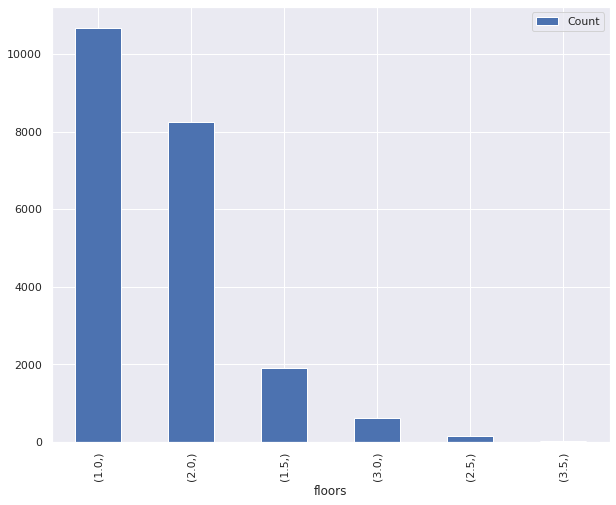

In [68]:
df_cau4.plot(kind = 'bar', figsize=(10,8))

**Nhận xét**:
- `1.0` và `2.0` là 2 giá trị chiếm đa số số lượng của thuộc tính floors (cột floors). Trong đó giá trị `1.0` là cao nhất ($>10000$).
- Giá trị `3.5` chiếm thấp nhất trong các giá trị của feature floors, thấp hơn rất nhiều so với các giá trị còn lại.

## **Câu 5**: Vẽ boxplot cột waterfront theo giá nhà

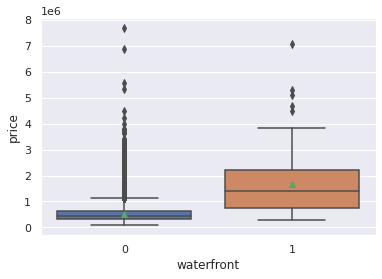

In [69]:
sns.boxplot(x=df['waterfront'], y= df['price'], showmeans=True)

**Nhận xét**:
- Với `waterfront = 0` thì nhiều giá trị ngoại lệ (ourlier) hơn `waterfront = 1`. Hơn nữa với `waterfront = 0`miền giá trị cũng nhỏ hơn `waterfront = 1`. Giá trị trung bình xấp xỉ Q2.
- Với `waterfront = 1` thì ít giá trị ngoại lệ (ourlier) hơn `waterfront = 0`. Hơn nữa với `waterfront = 1`miền giá trị cũng lớn hơn `waterfront = 0`. Giá trị trung bình lớn hơn Q2.

## **Câu 6**: Sử dụng regplot để đánh giá ảnh hưởng của các cột loại diện tích

In [70]:
col = df.columns
target = [i for i in col if 'sqft_' in i]

In [71]:
target

['sqft_living',
 'sqft_lot',
 'sqft_above',
 'sqft_basement',
 'sqft_living15',
 'sqft_lot15']

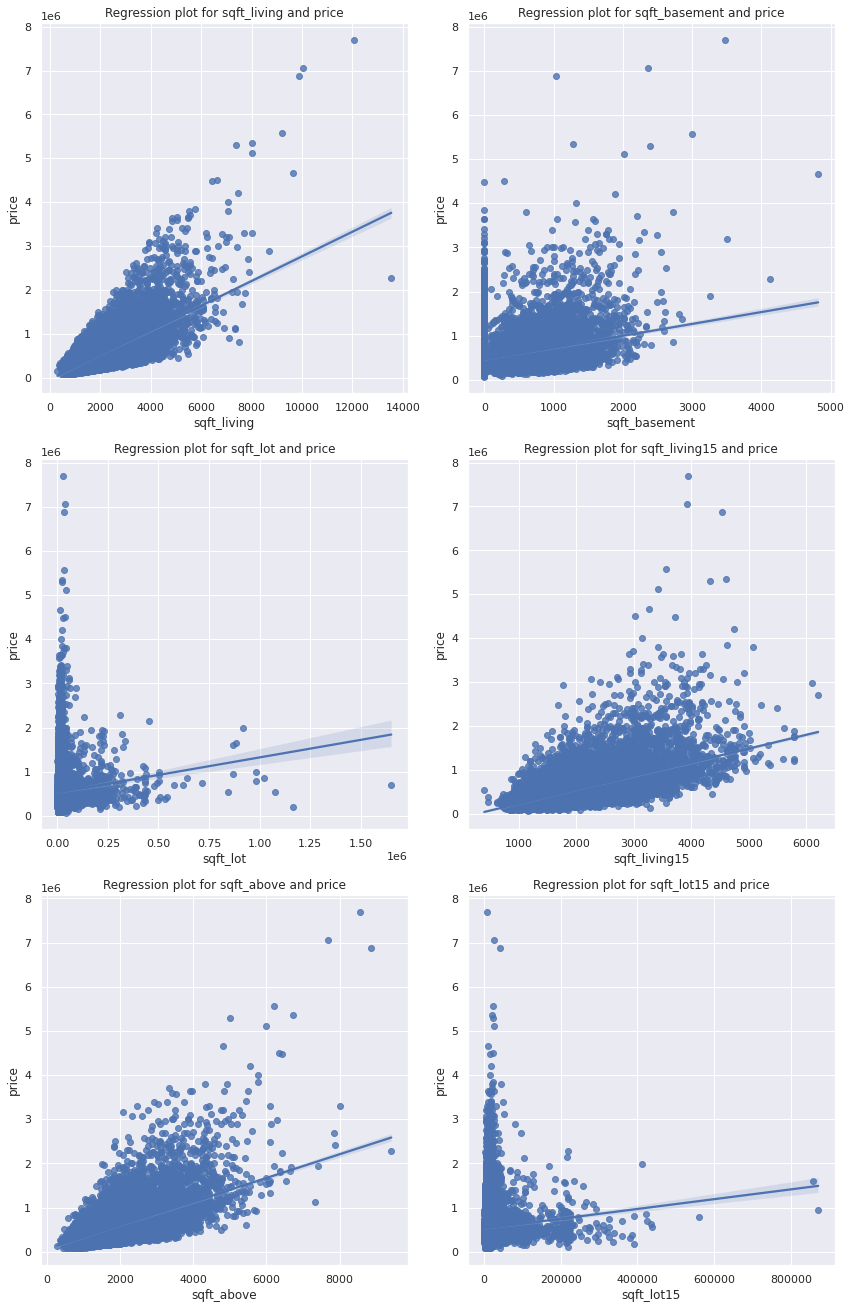

In [72]:
plt.figure(figsize=(12, len(target)*6))

for i in range(3):
    plt.subplot(len(target), 2, 2*i+1)
    sns.regplot(x=target[i], y='price', data=df)
    plt.title('Regression plot for {} and price'.format(target[i]))
    plt.subplot(len(target), 2, 2*i+2)
    sns.regplot(x=target[i+3], y='price', data=df)
    plt.title('Regression plot for {} and price'.format(target[i+3]))

plt.tight_layout()
plt.show()

**Nhận xét**:
-

## **Câu 7**: Thiết kế mô hình dùng pipeline

In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

In [74]:
features = ['floors', 'view', 'waterfront', 'bedrooms', 'grade', 'bathrooms', 
            'sqft_living15', 'sqft_above', 'sqft_living', 'sqft_basement']

In [75]:
df_cau7 = df[features]
y = df['price']

In [76]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('transform', PolynomialFeatures(degree=2)),
                 ('model', LinearRegression())])

In [77]:
pipe.fit(df_cau7, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('transform', PolynomialFeatures()),
                ('model', LinearRegression())])

In [78]:
y_pipe = pipe.predict(df_cau7)

In [81]:
print('Training set score: ', pipe.score(df_cau7, y))
print('Training MSE: ', mean_squared_error(y_pipe, y))
print('Training R2: ', r2_score(y_pipe, y))

Training set score:  0.6789313499520159
Training MSE:  43272394043.03968
Training R2:  0.5270599783363169


## **Câu 8**: 

## **Câu 9**: 

## **Câu 10**: 